In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 56.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.8/236.8 kB 30.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 108.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 70.6 MB/s eta 0:00:00


Finetune. Note that the files must be executed in the order finetune_gs.py then finetune_insc.py


In [ ]:
!python /content/drive/MyDrive/semantic-segmentation-master/finetune_gs.py

In [ ]:
!python /content/drive/MyDrive/semantic-segmentation-master/finetune_insc.py

Summarise


In [7]:
!pip install bert-extractive-summarizer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 38.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.8/236.8 kB 26.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 106.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 73.4 MB/s eta 0:00:00


In [8]:
# summarise.py

# This code can be drastically improved
from summarizer import Summarizer
import re
import csv


# Check for missing [Facts] or [Ratio of the decision]

# Apply summariser for 3 sentences. Calculate number of words. Add number of words to facts and arguments separately.
# Find the 3 averages
# Add the summariser text to a separate file called summary.txt

def main():

    model = Summarizer()


    directory = "/content/drive/MyDrive/semantic-segmentation-master/finetune.txt"
    summary = "/content/drive/MyDrive/semantic-segmentation-master/summary.txt"


    facts = list() # Might be better to use tuples
    ratio = list()
    facts_wc = list()
    ratio_wc = list()

    facts_words = 0
    ratio_words = 0

    data = [['num_words_facts', 'num_words_ratio', 'num_words_total']]

    with open(directory, 'r', encoding = "utf-8") as text:
        for line in text:
            if line[:7] == "[Facts]":
                fax = (line[7:]).strip()
                fax_summary = model(fax, num_sentences=3)
                facts.append(fax_summary)
                facts_words += get_num_words(fax_summary)
                facts_wc.append(get_num_words(fax_summary))
            elif line[:23] == "[Ratio of the decision]":
                arg = (line[23:]).strip()
                arg_summary = model(arg, num_sentences=3)
                ratio.append(arg_summary)
                ratio_words += get_num_words(arg_summary)
                ratio_wc.append(get_num_words(arg_summary))
            else: continue

    with open(summary, 'w') as file:

      if len(facts) == len(ratio):

          print(len(facts))


          for i in range(0, len(facts)):
              file.write('[Facts] ' + (facts[i])[:-1] + '\n' + '[Ratio of the decision] ' + (ratio[i])[:-1] + '\n' * 2)

              data_entry = [str(facts_wc[i]), str(ratio_wc[i]), str(facts_wc[i] + ratio_wc[i])]
              data.append(data_entry)


          print("Average facts word count: ", end='')
          print(facts_words/len(facts))
          print("Average ratio word count: ", end='')
          print(ratio_words/len(ratio))
          print("Total average word count : ", end='')
          print((facts_words + ratio_words)/ len(facts))

          file_path = "/content/drive/MyDrive/semantic-segmentation-master/data.csv"

          with open(file_path, 'w', newline='') as file:
              writer = csv.writer(file)
              writer.writerows(data)





      else: print("Fail")


def get_num_words(text):
    sentences = re.split(r"[.!?]+", text)
    words = []

    for sentence in sentences:
        sentence = sentence.strip()
        if sentence:
            words.extend(re.split(r"\s+", sentence))

    return len(words)

main()



Some weights of the model checkpoint at bert-large-uncased were not used when initializing BertModel: ['cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

100
Average facts word count: 77.68
Average ratio word count: 83.63
Total average word count : 161.31


Displau

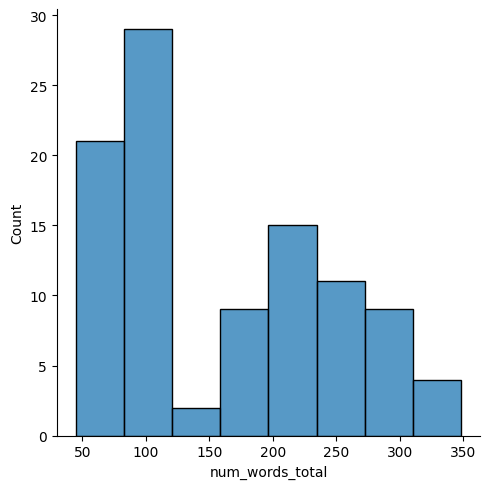

In [11]:
import seaborn as sns
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/semantic-segmentation-master/data.csv')
sns.displot(x = 'num_words_total', data = df)


Train


In [ ]:
# Change train_directory path
train_directory = '/content/drive/MyDrive/ColabNotebooks/data/chatbot_docs/training_data/q_and_a'
text_data = read_documents_from_directory(train_directory)
text_data = re.sub(r'\n+', '\n', text_data).strip()  # Remove excess newline characters


NameError: ignored

In [ ]:
from transformers import TextDataset, DataCollatorForLanguageModeling
from transformers import GPT2Tokenizer, GPT2LMHeadModel
from transformers import Trainer, TrainingArguments

In [ ]:
def load_dataset(file_path, tokenizer, block_size = 128):
    dataset = TextDataset(
        tokenizer = tokenizer,
        file_path = file_path,
        block_size = block_size,
    )
    return dataset


In [ ]:
def load_data_collator(tokenizer, mlm = False):
    data_collator = DataCollatorForLanguageModeling(
        tokenizer=tokenizer,
        mlm=mlm,
    )
    return data_collator

In [ ]:
def train(train_file_path,model_name,
          output_dir,
          overwrite_output_dir,
          per_device_train_batch_size,
          num_train_epochs,
          save_steps):
  tokenizer = GPT2Tokenizer.from_pretrained(model_name)
  train_dataset = load_dataset(train_file_path, tokenizer)
  data_collator = load_data_collator(tokenizer)

  tokenizer.save_pretrained(output_dir)

  model = GPT2LMHeadModel.from_pretrained(model_name)

  model.save_pretrained(output_dir)

  training_args = TrainingArguments(
          output_dir=output_dir,
          overwrite_output_dir=overwrite_output_dir,
          per_device_train_batch_size=per_device_train_batch_size,
          num_train_epochs=num_train_epochs,
      )

  trainer = Trainer(
          model=model,
          args=training_args,
          data_collator=data_collator,
          train_dataset=train_dataset,
  )

  trainer.train()
  trainer.save_model()

In [ ]:
train_file_path = "/content/drive/MyDrive/semantic-segmentation-master/infer/finetune.txt"
model_name = 'gpt2'
#output_dir = '/content/drive/MyDrive/ColabNotebooks/models/chat_models/custom_full_text'
output_dir = '/content/drive/MyDrive/output'
overwrite_output_dir = False
per_device_train_batch_size = 8
num_train_epochs = 50
save_steps = 1

In [ ]:
pip install accelerate -U

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
train(
    train_file_path=train_file_path,
    model_name=model_name,
    output_dir=output_dir,
    overwrite_output_dir=overwrite_output_dir,
    per_device_train_batch_size=per_device_train_batch_size,
    num_train_epochs=num_train_epochs,
    save_steps=save_steps
)


/usr/local/lib/python3.10/dist-packages/transformers/data/datasets/language_modeling.py:53: FutureWarning: This dataset will be removed from the library soon, preprocessing should be handled with the 🤗 Datasets library. You can have a look at this example script for pointers: https://github.com/huggingface/transformers/blob/main/examples/pytorch/language-modeling/run_mlm.py
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Step,Training Loss


Step,Training Loss
500,3.494700
1000,2.812400
1500,2.374500
2000,2.005400
2500,1.695100
3000,1.433200
3500,1.219700
4000,1.051900
4500,0.912800
5000,0.803300


Inference


In [ ]:
from transformers import PreTrainedTokenizerFast, GPT2LMHeadModel, GPT2TokenizerFast, GPT2Tokenizer

In [ ]:
def load_model(model_path):
    model = GPT2LMHeadModel.from_pretrained(model_path)
    return model


def load_tokenizer(tokenizer_path):
    tokenizer = GPT2Tokenizer.from_pretrained(tokenizer_path)
    return tokenizer

def generate_text(model_path, sequence, max_length):

    model = load_model(model_path)
    tokenizer = load_tokenizer(model_path)
    ids = tokenizer.encode(f'{sequence}', return_tensors='pt')
    final_outputs = model.generate(
        ids,
        do_sample=True,
        max_length=max_length,
        pad_token_id=model.config.eos_token_id,
        top_k=50,
        top_p=0.95,
    )
    print(tokenizer.decode(final_outputs[0], skip_special_tokens=True))

In [ ]:
model_path = "/content/drive/MyDrive/output"
sequence = "[Facts] one lakshminarayana iyer  a hindu brahmin  who owned considerable properties in the tirunelveli district  died on 13th december  1924  leaving him surviving a widow ranganayaki  and a married daughter ramalakshmi. ramalakshmi had married the plaintiff and had a number of children from him. they were all alive in december  1924  when lakshminarayana died. by this will he gave the following directions     after my lifetime  you  the aforesaid ranganayaki amminal  my wife  shall till your lifetime  enjoy the aforesaid entire properties  the outstandings due to me  the debts payable by me  and the chit amounts payable by me. after your lifetime ramalakshmi ammal  our daughter and wife of rama ayyar avergal of melagaram village  and her heirs shall enjoy them with absolute rights and powers of alienation such as gift  exchange  and sale from son to grandson and so on for generations. as regards the payment of maintenance to be made to chinnanmal alias lakshmi ammal  wife of my late son hariharamayyan  my wife ranganayaki ammal shall pay the same as she pleases  and obtain a release deed. ranganayaki entered into possession of the properties on the death of her husband. on 21st february  1928  she settled the maintenance claim of lakshmi ammal and obtained a deed of release from her by paying her a sum of rs. 3 350 in cash and by executing in her favour an agreement stipulating to pay her a sum of rs. 240 per annum. ramalakshmi died on 25th april  1938 during the lifetime of the widow. none of her children survived her. on the 24th july  1945  the widow describing herself as an absolute owner of the properties of her husband sold one of the items of the property to the 2nd defendant for rs  500. on the 18th september  1945  the suit out of which this appeal arises was instituted by the plaintiff  the husband and the sole heir of ramalakshmi  for a declaration that the said sale would not be binding on him beyond the lifetime of the widow. a prayer was made that the widow be restrained from alienating the other properties in her possession. on the 19th september  1945  an ad interim injunction was issued by the high court restraining the widow from alienating the properties in her possession and forming part of her husband s estate  inspite of this injunction  on the 27th september  1945  she executed two deeds of settlement in favour of the other defendants comprising a number of properties. the plaintiff was allowed to amend his plaint and include therein a prayer for a declaration in respect of the invalidity of these alienations as well. it was averred in the plaint that ramalakshmi obtained a vested interest in the suit  properties under the will of her father and plaintiff was thus entitled to maintain the suit. the defendants pleaded that the plaintiff had no title to maintain the suit  that the widow was entitled under the will to an absolute estate or at least to an estate analogous to and not less than a widow s estate  that the estate given to ramalakshmi under the will was but a contingent one and she having predeceased the widow  no interest in the suit properties devolved on the plaintiff. the main issue in the suit was whether  the widow took under the will an absolute estate or an estate like the hindu widow s estate and whether the daughter s interest therein was in the nature of a contingent remainder  or whether she got in the properties a vested interest. the subordinate judge held that the widow took under the will a limited life  interest  and not an absolute estate or even a widow s estate under hindu law  and that the daughter got there under a vested interest in the properties to which the plaintiff succeeded on her death. in view of this finding he granted the plaintiff a declaratory decree to the effect that the first defendant had only an estate for life in the suit properties and that the alienations made by her would not endure beyond her lifetime. the question as to the validity of the alienations was left undetermined. the unsuccessful defendants preferred an appeal against this decree to the high court of judicature at madras. during the pendency of the appeal the widow died on 14th february  1948. the high court by its judgment under appeal affirmed the decision of the trial judge and maintained his view on the construction of the will. leave to appeal to the supreme court was granted and the appeal was admitted on the 27th november  1951."
max_len = 1000
generate_text(model_path, sequence, max_len)

[Facts] one lakshminarayana iyer  a hindu brahmin  who owned considerable properties in the tirunelveli district  died on 13th december  1924  leaving him surviving a widow ranganayaki  and a married daughter ramalakshmi. ramalakshmi had married the plaintiff and had a number of children from him. they were all alive in december  1924  when lakshminarayana died. by this will he gave the following directions     after my lifetime  you  the aforesaid ranganayaki amminal  my wife  shall till your lifetime  enjoy the aforesaid entire properties  the outstandings due to me  the debts payable by me  and the chit amounts payable by me. after your lifetime ramalakshmi ammal  our daughter and wife of rama ayyar avergal of melagaram village  and her heirs shall enjoy them with absolute rights and powers of alienation such as gift  exchange  and sale from son to grandson and so on for generations. as regards the payment of maintenance to be made to chinnanmal alias lakshmi ammal  wife of my late 

In [ ]:
!pip install git+https://github.com/dmmiller612/lecture-summarizer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/dmmiller612/lecture-summarizer to /tmp/pip-req-build-tj1f3gpr
  Running command git clone --filter=blob:none --quiet https://github.com/dmmiller612/lecture-summarizer /tmp/pip-req-build-tj1f3gpr
  Resolved https://github.com/dmmiller612/lecture-summarizer to commit cc63c0853f1d1d193f1429d4cbd50fbc0a01344e
  Preparing metadata (setup.py) ... done
  Created wheel for lecture-summarizer: filename=lecture_summarizer-0.0.1-py3-none-any.whl size=2924 sha256=0c8a8f3343b31d56efd9174aad732e91602192eb9103874cb1efc330e56064c3
  Stored in directory: /tmp/pip-ephem-wheel-cache-zofbq9nc/wheels/e6/07/db/c324e11fcc226f625f6d4341e23c97b6815e7be380eb96ed9d
Successfully built lecture-summarizer


In [ ]:
lecture-summarizer get-lectures -base_path localhost:5000

SyntaxError: ignored

In [ ]:
from transformers import PreTrainedTokenizerFast, GPT2LMHeadModel, GPT2TokenizerFast, GPT2Tokenizer
from nltk.translate.bleu_score import sentence_bleu

In [ ]:
def load_model(model_path):
    model = GPT2LMHeadModel.from_pretrained(model_path)
    return model


def load_tokenizer(tokenizer_path):
    tokenizer = GPT2Tokenizer.from_pretrained(tokenizer_path)
    return tokenizer

def generate_text(model_path, sequence, max_length):

    model = load_model(model_path)
    tokenizer = load_tokenizer(model_path)
    ids = tokenizer.encode(f'{sequence}', return_tensors='pt')
    final_outputs = model.generate(
        ids,
        do_sample=True,
        max_length=max_length,
        pad_token_id=model.config.eos_token_id,
        top_k=50,
        top_p=0.95,
    )
    print(tokenizer.decode(final_outputs[0], skip_special_tokens=True))

In [ ]:
model1_path = "/content/drive/MyDrive/Procheta/gpt2-finetune"
max_len = 50

input_facts=[]
gold_argument=[]

with open("fintune.txt","r") as f:
  for line in f:
    if line.startswith("[Facts]"):
      input_facts.append(line.strip())
    else:
      gold_argument.append(line.strip())




total_bleu=0
gold_argument=[]

for i in range(len(input_facts)):
  output=generate_text(model1_path, input_facts[i], max_len)
  output=output.replace(input_facts[i],"")
  bleu=sentence_bleu(gold_argument[i].split(), output.split())
  print('BLEU score -> {}'.format(bleu))
  total_bleu=total_bleu+bleu


avg_bleu=total_bleu/len(input_facts)

In [ ]:
from nltk.translate.bleu_score import sentence_bleu


sentence1="This is a refrence".split()
sentence2="This is a refrence".split()

print('BLEU score -> {}'.format(sentence_bleu(sentence1, sentence2)))

BLEU score -> 1.2882297539194154e-231


/usr/local/lib/python3.10/dist-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 2-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/usr/local/lib/python3.10/dist-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 3-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/usr/local/lib/python3.10/dist-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_